In [ ]:
!pip install PyDrive

In [2]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
download = drive.CreateFile({'id': '114BGCJ_5cjHLRmVoBp_be7qenZ4CaWtd'})

In [5]:
download.GetContentFile('mil_ird_challenge.zip')

In [6]:
# !unzip mil_ird_challenge.zip

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import gc
import cv2
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [31]:
import random
train_dir = 'mil_ird_challenge/train'
test_dir = 'mil_ird_challenge/test'

train_0 = ['mil_ird_challenge/train/0/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/0') if 'DS' not in i]
train_1 = ['mil_ird_challenge/train/1/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/1')if 'DS' not in i]
train_2 = ['mil_ird_challenge/train/2/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/2')if 'DS' not in i]
train_3 = ['mil_ird_challenge/train/3/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/3')if 'DS' not in i]
train_4 = ['mil_ird_challenge/train/4/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/4')if 'DS' not in i]
train_5 = ['mil_ird_challenge/train/5/{}'.format(i) for i in os.listdir('mil_ird_challenge/train/5')if 'DS' not in i]


test_0 = ['mil_ird_challenge/test/0/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/0')if 'DS' not in i]
test_1 = ['mil_ird_challenge/test/1/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/1')if 'DS' not in i]
test_2 = ['mil_ird_challenge/test/2/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/2')if 'DS' not in i]
test_3 = ['mil_ird_challenge/test/3/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/3')if 'DS' not in i]
test_4 = ['mil_ird_challenge/test/4/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/4')if 'DS' not in i]
test_5 = ['mil_ird_challenge/test/5/{}'.format(i) for i in os.listdir('mil_ird_challenge/test/5')if 'DS' not in i]


train_imgs = train_0[0:2000] + train_1[0:2000] + train_2[0:2000]+ train_3[0:2000] + train_4[0:2000]+ train_5[0:2000] 
test_imgs =  test_0[0:400] + test_1[0:400] + test_2[0:400]+ test_3[0:400] + test_4[0:400]+ test_5[0:400] 

random.shuffle(train_imgs)
random.shuffle(test_imgs)
del train_0
del train_1
del train_2
del train_3
del train_4
del train_5
del test_0
del test_1
del test_2
del test_3
del test_4
del test_5
gc.collect()

12231

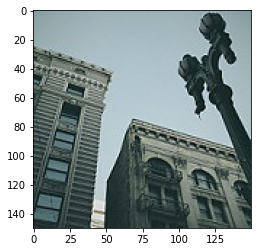

In [32]:
import matplotlib.image as mpimg
for ima in train_imgs[0:4]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.imshow(img)


In [10]:
nrows = 150
ncolumns = 150
channels = 3

In [11]:
def read_and_process_image(list_of_images):
    '''
    return two arrays:
    X is an array of resized images
    Y is an array of resized labels
    '''
    X = []
    y= []
    
    for image in list_of_images:
      X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR), (nrows,ncolumns)))
      if '/0/' in image: 
       y.append(0)
      if '/1/' in image:
       y.append(1)
      if '/2/' in image:
        y.append(2)
      if '/3/' in image:
        y.append(3)
      if '/4/' in image:
        y.append(4)
      if '/5/' in image:
        y.append(5)
    return X,y

      # print(cv2.imread(image).shape)

In [33]:
# X, y = read_and_process_image(train_imgs)
x_train,y_train = read_and_process_image(train_imgs)
x_val , y_val = read_and_process_image(test_imgs)
# read_and_process_image(train_imgs)

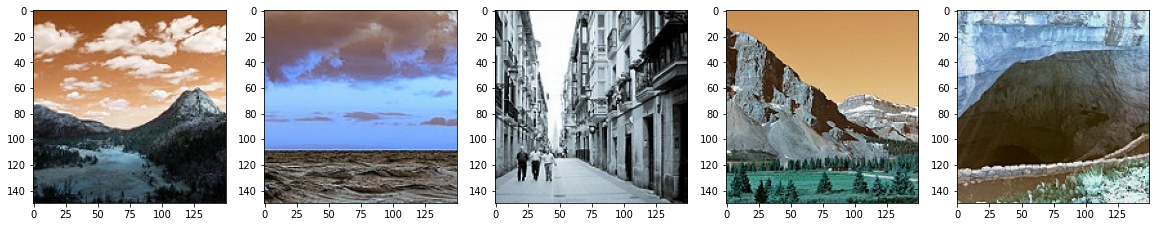

In [13]:
plt.figure(figsize = (20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns +1 , columns , i +1)
    plt.imshow(x_train[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'label for 0/1/2/3/4/5')

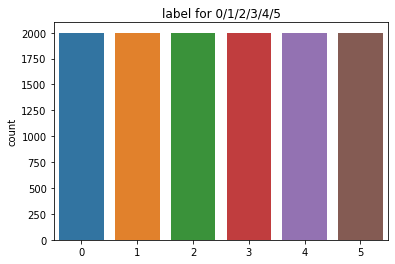

In [34]:
import seaborn as sns
del test_imgs
del train_imgs
img_size = 150
gc.collect()

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

sns.countplot(y_train)
plt.title('label for 0/1/2/3/4/5')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'label for 0/1/2/3/4/5')

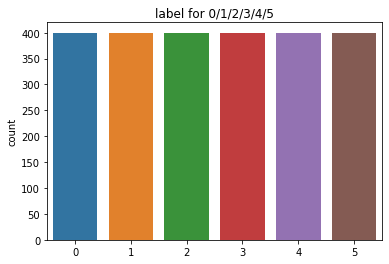

In [15]:
sns.countplot(y_val)
plt.title('label for 0/1/2/3/4/5')

In [16]:
print("Shape of train images is:", x_train.shape)
print("Shape of labels is: ", y_train.shape)

Shape of train images is: (12000, 150, 150, 3)
Shape of labels is:  (12000,)


In [17]:
from sklearn.model_selection import train_test_split
# X_train, X_val, y_train , y_val = train_test_split(X,y,test_size = 0.20, random_state =2)

print("Shape of train images is:" , x_train.shape)
print("Shape of validaion images is: ",y_train.shape)
print("Shape of labels is: ",x_val.shape)
print("Shape of labels is: ",y_val.shape)

Shape of train images is: (12000, 150, 150, 3)
Shape of validaion images is:  (12000,)
Shape of labels is:  (2400, 150, 150, 3)
Shape of labels is:  (2400,)


In [18]:
ntrain = len(x_train)
nval = len(x_val)

batch_size = 32

In [35]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [20]:
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, random_state=42, test_size=0.2)

In [36]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(6, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 64)      

In [37]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


375/375 [==============================] - 6s 14ms/step - loss: 1.7843 - accuracy: 0.2022 - val_loss: 1.7517 - val_accuracy: 0.2862
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 1.7407 - accuracy: 0.2782 - val_loss: 1.6896 - val_accuracy: 0.4071
Epoch 3/100
375/375 [==============================] - 5s 13ms/step - loss: 1.6659 - accuracy: 0.3697 - val_loss: 1.5985 - val_accuracy: 0.4387
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 1.5709 - accuracy: 0.4195 - val_loss: 1.4970 - val_accuracy: 0.4812
Epoch 5/100
375/375 [==============================] - 5s 13ms/step - loss: 1.4769 - accuracy: 0.4626 - val_loss: 1.4116 - val_accuracy: 0.5088
Epoch 6/100
375/375 [==============================] - 5s 13ms/step - loss: 1.3997 - accuracy: 0.4903 - val_loss: 1.3457 - val_accuracy: 0.5354
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 1.3405 - accuracy: 0.5081 - val_loss: 1.2920 - val_accuracy: 0.5450
Epoc

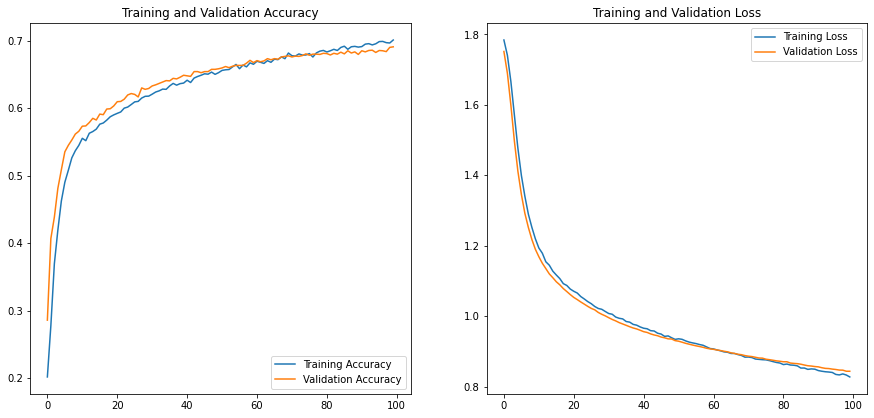

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred,axis=1)
print(y_val)
print(classification_report(y_val, y_pred, target_names = ['0','1','2','3','4','5']))

[3 1 4 ... 5 2 4]
              precision    recall  f1-score   support

           0       0.57      0.61      0.59       400
           1       0.90      0.90      0.90       400
           2       0.66      0.73      0.69       400
           3       0.64      0.63      0.64       400
           4       0.63      0.52      0.57       400
           5       0.74      0.75      0.75       400

    accuracy                           0.69      2400
   macro avg       0.69      0.69      0.69      2400
weighted avg       0.69      0.69      0.69      2400



In [26]:
del x_train, y_train, x_test, y_test,y_val, x_val

NameError: ignored

Predict the result

In [41]:
pred_dir = 'mil_ird_challenge/pred'
pred_imgs = ['mil_ird_challenge/pred/{}'.format(i) for i in os.listdir(pred_dir) if 'DS' not in i]

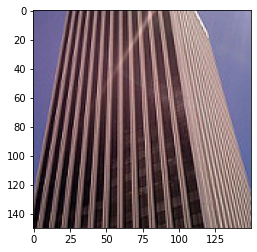

In [43]:
import matplotlib.image as mpimg
for ima in pred_imgs[0:4]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.imshow(img)

In [51]:
X = []    
for image in pred_imgs:
  X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR), (nrows,ncolumns)))


In [ ]:
X = np.array(X) / 255
X.reshape(-1, img_size, img_size, 1)

In [56]:
X[0]

array([[[0.9372549 , 0.94901961, 0.94117647],
        [0.9372549 , 0.94901961, 0.94117647],
        [0.93333333, 0.94117647, 0.94117647],
        ...,
        [0.98823529, 0.99607843, 0.99607843],
        [0.98823529, 0.99607843, 0.99607843],
        [0.98431373, 0.99215686, 0.99215686]],

       [[0.90980392, 0.92156863, 0.91372549],
        [0.92156863, 0.93333333, 0.9254902 ],
        [0.92941176, 0.9372549 , 0.9372549 ],
        ...,
        [0.98431373, 0.99215686, 0.99215686],
        [0.98431373, 0.99215686, 0.99215686],
        [0.98431373, 0.99215686, 0.99215686]],

       [[0.92156863, 0.92941176, 0.92941176],
        [0.9372549 , 0.94509804, 0.94509804],
        [0.94901961, 0.95686275, 0.95686275],
        ...,
        [0.97647059, 0.99607843, 0.99215686],
        [0.97647059, 0.99607843, 0.99215686],
        [0.97647059, 0.99607843, 0.99215686]],

       ...,

       [[0.8       , 0.75294118, 0.74509804],
        [0.80392157, 0.75686275, 0.74901961],
        [0.80784314, 0

In [69]:
y_pred = model.predict(X)
y_pred = np.argmax(y_pred,axis=1)
print(y_pred)

[5 4 1 0 1 5 3 0 5 2 1 1 4 0 5 2 3 4 0 5 5 3 0 3 0 4 5 3 0 4 3 3 1 2 4 5 1
 0 4 5 4 0 5 1 4 4 4 5 1 1 3 0 5 0 3 1 3 5 0 5 5 4 2 5 2 3 3 4 3 5 0 5 1 5
 0 3 0 0 5 1 0]


In [70]:
lst = []
for image in pred_imgs :
  lst.append(image.split("mil_ird_challenge/pred/",1)[1])
len(lst)

81

In [71]:
result = pd.DataFrame(
    {'File': lst,
     'Prediction': y_pred,
    })

In [73]:
result

,File,Prediction
0,17617.jpg,5
1,17363.jpg,4
2,17567.jpg,1
3,17636.jpg,0
4,1757.jpg,1
...,...,...
76,17475.jpg,0
77,17394.jpg,0
78,17368.jpg,5
79,17604.jpg,1


In [59]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission (1).csv


In [60]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['submission.csv']))

In [74]:
df2

,File,Prediction
0,17410.jpg,NaN
1,1760.jpg,NaN
2,17625.jpg,NaN
3,17567.jpg,NaN
4,17509.jpg,NaN
...,...,...
95,17402.jpg,NaN
96,17381.jpg,NaN
97,17411.jpg,NaN
98,17593.jpg,NaN


In [94]:
final = df2[['File']].merge(result,how = 'left', on = 'File').astype({'Prediction':'object'})

In [95]:
final

,File,Prediction
0,17410.jpg,3
1,1760.jpg,4
2,17625.jpg,1
3,17567.jpg,1
4,17509.jpg,4
...,...,...
95,17402.jpg,4
96,17381.jpg,0
97,17411.jpg,2
98,17593.jpg,NaN


In [98]:
from google.colab import drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [99]:
final.to_csv('submission.csv')
!cp submission.csv "drive/My Drive/"